# Random Forest Regression Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_feature = pd.read_csv('Ready_for_machine_learning_2019_1_23.csv')
df_feature.head()

,CurrentAcres,TotalGrossArea,FinishedArea,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,Grade,YearBlt,SalePrice,NumofRooms,...,HeatType_188,HeatType_281,HeatType_739,HeatType_3893,HeatType_4255,Foundation_130,Foundation_1219,Foundation_2322,Foundation_2628,Foundation_3199
0,0.05597,1760,840.00000,121600,0,30900.0,5,1912,158000,5,...,0,0,0,1,0,0,0,0,1,0
1,0.08242,2676,1436.00000,94400,700,146800.0,7,1899,231750,7,...,0,0,0,0,1,0,0,0,1,0
2,0.00000,2184,1572.80005,0,0,268000.0,10,1986,381500,6,...,0,0,0,0,1,0,1,0,0,0
3,0.09832,3699,2087.00000,130100,0,210700.0,8,1910,430000,8,...,0,0,0,1,0,0,0,0,1,0
4,0.70154,62852,37977.00000,547700,51800,1306100.0,9,2013,505683,103,...,0,0,0,0,1,0,1,0,0,0


#### Set the target and variables.

In [3]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice

#### Generate Train and Test sets, and perform scaling.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Random Forest Regression

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 12706962282.7190
Square of MSE: 112725.1626
Average Percentage of Abosulute Error: 0.2123


#### Plot feature importance

In [23]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

#### Unable to read variable names. The following list the feature names from the least important to the most important. 

In [24]:
X.columns[sorted_idx]

Index(['BuildingType_30', 'BuildingType_8', 'LandUse_8', 'BuildingType_9',
       'BuildingType_12', 'BuildingType_31', 'BuildingType_44',
       'BuildingType_11', 'BuildingType_24', 'BuildingType_103',
       'Foundation_130', 'LandUse_43', 'HeatType_58', 'BuildingType_14',
       'BuildingType_46', 'BuildingType_110', 'BuildingType_219',
       'BuildingType_108', 'BuildingType_60', 'BuildingType_22', 'HeatFuel_64',
       'BuildingType_81', 'BuildingType_101', 'BuildingType_338',
       'BuildingType_87', 'BuildingType_39', 'LandUse_45', 'BuildingType_83',
       'HeatFuel_281', 'BuildingType_162', 'HeatType_281', 'LandUse_239',
       'BuildingType_482', 'BuildingType_144', 'BuildingType_147',
       'LandUse_2150', 'BuildingType_589', 'HeatType_50', 'BuildingType_111',
       'Foundation_2628', 'HeatFuel_8187', 'LandUse_367', 'LandUse_5176',
       'Foundation_3199', 'HeatFuel_1039', 'LandUse_1041', 'BuildingType_291',
       'BuildingType_1193', 'HeatType_54', 'BuildingType_1389

####  The top 7 of feature importance are 'CurrentBuildingValue', 'TotalGrossArea', 'CurrentLandValue', 'FinishedArea', 'NumofUnits',  'CurrentAcres', and 'NumofRooms'.        

#### To visualize the feature importance, a simplified model is required.

#### Reset the target y and the variable table X by taking the important features.

In [25]:
X2=df_feature[['Foundation_1219', 'LandUse_285', 'HeatType_4255', 'HeatType_188',
       'Foundation_2322', 'BuildingType_298', 'HeatType_3893',
       'CurrentYardItemsValue', 'YearBlt', 'LandUse_117', 'Grade',
       'Depreciation', 'PropertyCenterPoint_y', 'PropertyCenterPoint_x',
       'NumofRooms', 'CurrentAcres', 'NumofUnits', 'FinishedArea',
       'CurrentLandValue', 'TotalGrossArea', 'CurrentBuildingValue']]
y2=df_feature.SalePrice

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

MSE: 13010567205.5662
Square of MSE: 114063.8734
Average Percentage of Abosulute Error: 0.2137


#### Plot feature importance of the simplified model.

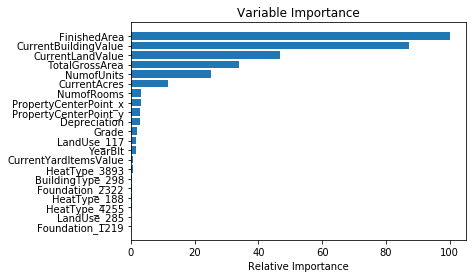

In [26]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

 #### Note that the order of the top 7 are different from the full model. But the top 7 are still the top 7.

#### Search for the best model by testing different n_estimators. MSE is more highly valued than the average percentage abosolute deviation.

In [6]:
# Initial model 
reg0 = RandomForestRegressor(random_state=0)
reg0.fit(X_train, y_train)
mse0 = mean_squared_error(y_test, reg0.predict(X_test))
ape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best model and parameters
bestreg = reg0
bestmse = mse0
best_n_est = 10 # default

 
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(1,50,1)

for n_est in N_est: 
    reg = RandomForestRegressor(n_estimators=n_est,random_state=0)
    reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
    print("n_est = %.0f" % n_est)            
    print("mse = %.4f" % mse)
    print("ape = %.4f" % ape)
    print("__________________________________")
    if mse<bestmse: 
        bestreg = reg
        bestmse = mse
        bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
        best_n_est = n_est              

print("best n_estimators = %.0f" % best_n_est)           
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)  

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


n_est = 1
mse = 17645046011.9628
ape = 0.2556
__________________________________
n_est = 2
mse = 15065367839.8196
ape = 0.2378
__________________________________
n_est = 3
mse = 14215022965.7328
ape = 0.2264
__________________________________
n_est = 4
mse = 14576853415.5925
ape = 0.2213
__________________________________
n_est = 5
mse = 14438362899.6528
ape = 0.2192
__________________________________
n_est = 6
mse = 13475582816.4592
ape = 0.2168
__________________________________
n_est = 7
mse = 13398533204.4487
ape = 0.2152
__________________________________
n_est = 8
mse = 13391764550.4711
ape = 0.2132
__________________________________
n_est = 9
mse = 13048781920.6051
ape = 0.2137
__________________________________
n_est = 10
mse = 12706962282.7190
ape = 0.2123
__________________________________
n_est = 11
mse = 12603886654.8833
ape = 0.2108
__________________________________
n_est = 12
mse = 12814851989.7514
ape = 0.2100
__________________________________
n_est = 13
mse = 12350181

#### The model with the smallest MSE is with n_estimators=34. The MSE is 11284566340.9465. The average percentage absolute error is 20.4%. 